# 1.Imports and Setup

In [4]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


# 2.Load Dataset

In [5]:
df = pd.read_csv('../data/raw/fake_job_postings.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {df.shape[1]}")
df.head()

Dataset Shape: (17880, 18)
Total Rows: 17,880
Total Columns: 18


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# 3. Dataset information


In [6]:
print("="*80)
print("DATASET INFORMATION")
print("="*80)

df.info()

print("\n" + "="*80)
print("COLUMN NAMES")
print("="*80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-nu

# 4. Target variable distribution


TARGET VARIABLE DISTRIBUTION

Real Jobs (0): 17,014 (95.16%)
Fake Jobs (1): 866 (4.84%)
Imbalance Ratio: 19.65:1


FileNotFoundError: [Errno 2] No such file or directory: '../data/delivrables/target_distribution.png'

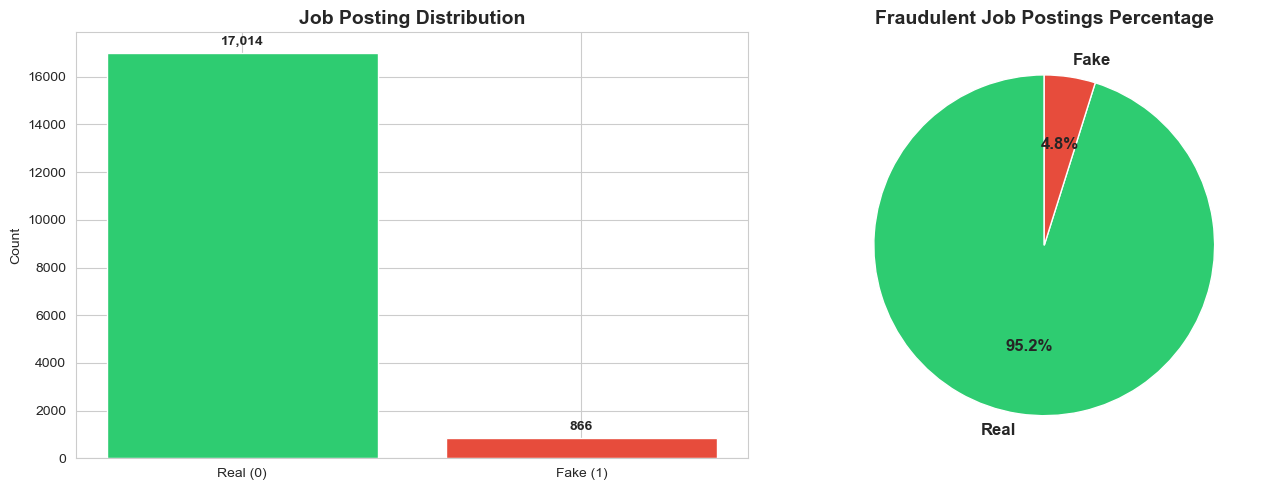

In [ ]:
import os

print("="*80)
print("TARGET VARIABLE DISTRIBUTION")
print("="*80)

fraud_counts = df['fraudulent'].value_counts()
fraud_pct = df['fraudulent'].value_counts(normalize=True) * 100

print(f"\nReal Jobs (0): {fraud_counts[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"Fake Jobs (1): {fraud_counts[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"Imbalance Ratio: {fraud_counts[0]/fraud_counts[1]:.2f}:1")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['Real (0)', 'Fake (1)'], fraud_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Job Posting Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(fraud_counts.values, labels=['Real', 'Fake'], autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Fraudulent Job Postings Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()

# Create directory if it doesn't exist
output_dir = '../data/delivrables'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(f'{output_dir}/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ Dataset is HIGHLY IMBALANCED - will need SMOTE or class weights")